In [1]:
import scanpy as sc
import pandas as pd

B cell lymphoma

In [7]:
data = sc.read_10x_h5('scButterfly/data/lymphoma/lymph_node_lymphoma_14k_filtered_feature_bc_matrix.h5', gex_only=False)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
import pandas as pd
cell_meta = pd.read_csv("scButterfly/data/lymphoma/annotated_cell_types_lymphoma.csv", index_col="Barcode")
data.obs = data.obs.join(cell_meta, how="left")

In [8]:
RNA_data = data[:, data.var['feature_types'] == 'Gene Expression'].copy()
ATAC_data = data[:, data.var['feature_types'] == 'Peaks'].copy()

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 14645 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'interval'

In [10]:
RNA_data.write('babel/data2/lymphoma/lymphoma_raw_RNA.h5ad')
ATAC_data.write('babel/data2/lymphoma/lymphoma_raw_ATAC.h5ad')

In [29]:
RNA_data.layers["counts"] = RNA_data.X.copy()
ATAC_data.layers["counts"] = ATAC_data.X.copy()

sc.pp.normalize_total(RNA_data, target_sum=1e6)
sc.pp.log1p(RNA_data)
sc.pp.highly_variable_genes(RNA_data, n_top_genes=3000)
sc.pp.pca(RNA_data, n_comps=50)
sc.pp.neighbors(RNA_data, n_neighbors=15, use_rep='X_pca')

In [30]:
sc.tl.umap(RNA_data, random_state=22)
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")

In [29]:
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=2, key_added="leiden_2")

In [37]:
RNA_data.write('data/lymphoma_RNA.h5ad')

In [38]:
ATAC_data.write('data/lymphoma_ATAC.h5ad')

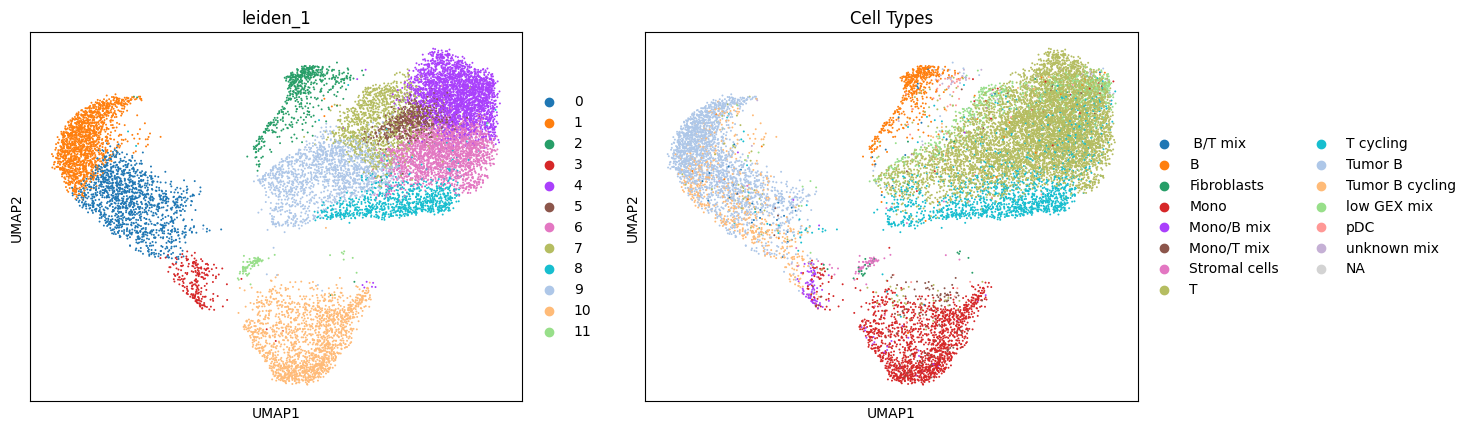

In [31]:
sc.pl.umap(RNA_data, color=["leiden_1", "Cell Types"], size=8)

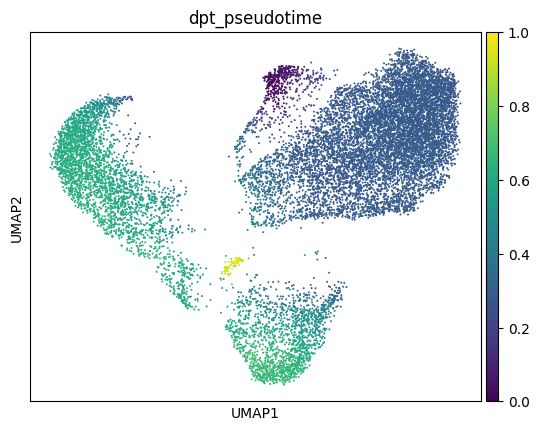

In [32]:
root_cell = RNA_data.obs[RNA_data.obs['Cell Types'] == 'B'].index[0]

# Set the root cell index in the .uns dictionary
RNA_data.uns['iroot'] = RNA_data.obs_names.get_loc(root_cell)

# Compute diffusion map and DPT pseudotime
sc.tl.diffmap(RNA_data)
sc.tl.dpt(RNA_data)

# Visualize pseudotime on UMAP
sc.pl.umap(RNA_data, color='dpt_pseudotime', color_map='viridis')

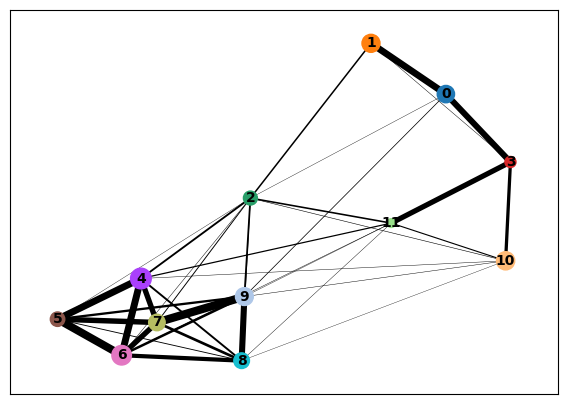

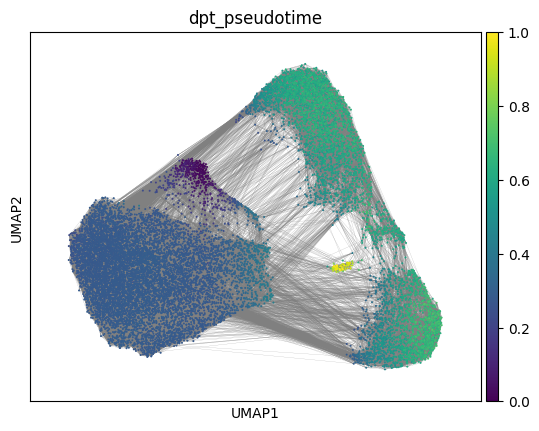

In [ ]:
sc.tl.paga(RNA_data, groups='leiden_1')
# Now plot PAGA graph overlaid on UMAP
sc.pl.paga(RNA_data, color='leiden_1', threshold=0.03, show=True)

sc.tl.umap(RNA_data, init_pos='paga')

# Plot UMAP with PAGA edges
sc.pl.umap(RNA_data, color='dpt_pseudotime', edges=True, show=True)

Cardiac dataset (annotated) for pseudotime analysis

In [ ]:
RNA_data = sc.read_mtx('data/cardiac/GSE263326_seurat_RNA_counts.mtx.gz')
ATAC_data = sc.read_mtx('data/cardiac/GSE263326_seurat_ATAC_counts.mtx.gz')
RNA_data = RNA_data.transpose()
ATAC_data = ATAC_data.transpose()
genes = pd.read_csv('data/cardiac/GSE263326_genes_rownamesRNA.csv', sep='\t', header=None)
peaks = pd.read_csv('data/cardiac/GSE263326_genomicregions_rownamesATAC.csv', sep='\t', header=None)
barcodes = pd.read_csv('data/cardiac/GSE263326_barcodes_colnames.csv', sep='\t', header=None)
metadata = pd.read_csv('data/cardiac/GSE263326_metadata.csv', index_col=0)

In [4]:
RNA_data.obs_names = barcodes[0].values
RNA_data.var_names = genes[0].values
ATAC_data.obs_names = barcodes[0].values
ATAC_data.var_names = peaks[0].values
RNA_data.obs = pd.concat([RNA_data.obs, metadata.loc[RNA_data.obs_names]], axis=1)
ATAC_data.obs = pd.concat([ATAC_data.obs, metadata.loc[ATAC_data.obs_names]], axis=1)

In [5]:
RNA_data.layers["counts"] = RNA_data.X.copy()
ATAC_data.layers["counts"] = ATAC_data.X.copy()

sc.pp.normalize_total(RNA_data, target_sum=1e6)
sc.pp.log1p(RNA_data)
sc.pp.highly_variable_genes(RNA_data, n_top_genes=3000)
sc.pp.pca(RNA_data, n_comps=50)
sc.pp.neighbors(RNA_data, n_neighbors=15, use_rep='X_pca')

In [6]:
sc.tl.umap(RNA_data, random_state=22)
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")

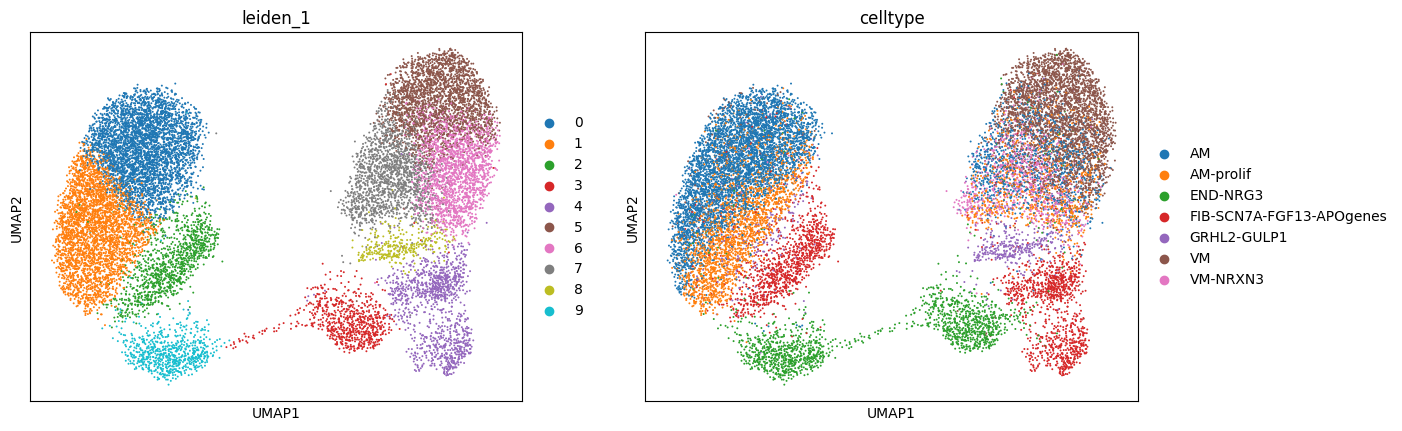

In [7]:
sc.pl.umap(RNA_data, color=["leiden_1", "celltype"], size=8)

In [8]:
adata = RNA_data.copy()

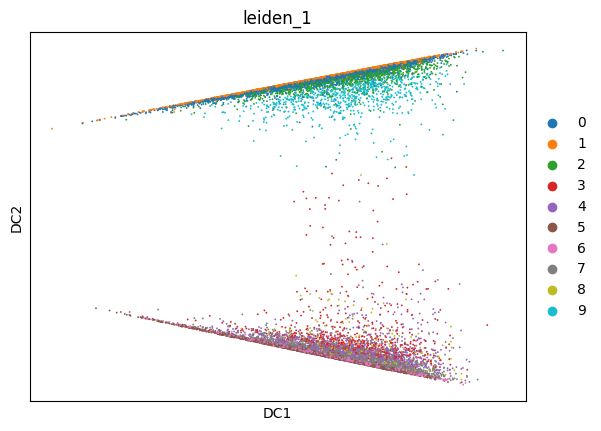

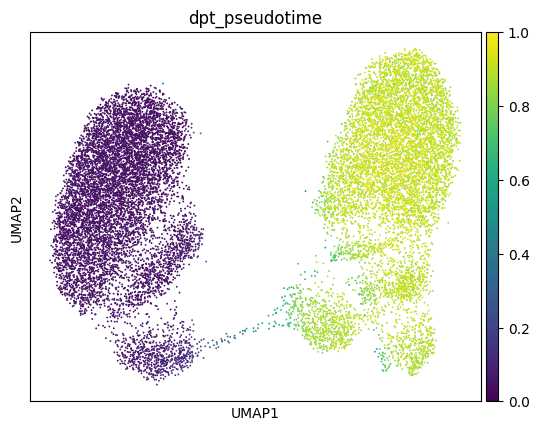

In [ ]:
# 2. Compute DPT (Diffusion Pseudotime)
# Choose a "root cell" (e.g. a stem cell cluster or an early-stage cell)
# You can set it manually using adata.obs_names or automatically from a cluster

# Example: use the first cell in cluster '0' as the root

# Pick a root cell – e.g., the first cell from an early cluster like cluster '0'
root_cell = adata.obs[adata.obs['leiden_1'] == '0'].index[0]

# Set the root cell index in the .uns dictionary
adata.uns['iroot'] = adata.obs_names.get_loc(root_cell)

# Compute diffusion map and DPT pseudotime
sc.tl.diffmap(adata)
sc.tl.dpt(adata)

# Visualize pseudotime on UMAP
sc.pl.umap(adata, color='dpt_pseudotime', color_map='viridis')

E18 mouse brain dataset (not annotated)

In [3]:
brain_data = sc.read_10x_h5('scButterfly/data/e18_mouse_brain_fresh_5k_filtered_feature_bc_matrix.h5', gex_only=False)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
RNA_data_brain = brain_data[:, brain_data.var['feature_types'] == 'Gene Expression'].copy()
ATAC_data_brain = brain_data[:, brain_data.var['feature_types'] == 'Peaks'].copy()
RNA_data_brain.layers["counts"] = RNA_data_brain.X.copy()
ATAC_data_brain.layers["counts"] = ATAC_data_brain.X.copy()


/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


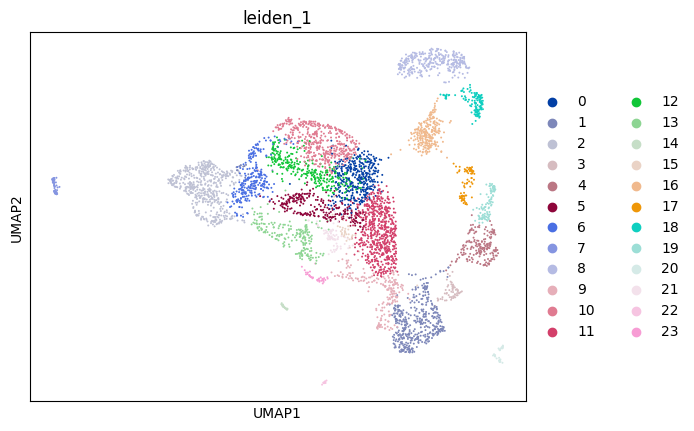

In [5]:
sc.pp.normalize_total(RNA_data_brain, target_sum=1e6)
sc.pp.log1p(RNA_data_brain)
sc.pp.highly_variable_genes(RNA_data_brain, n_top_genes=3000)
sc.pp.pca(RNA_data_brain, n_comps=50)
sc.pp.neighbors(RNA_data_brain, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(RNA_data_brain, random_state=99)
sc.tl.leiden(RNA_data_brain, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")
sc.pl.umap(RNA_data_brain, color="leiden_1", size=8)

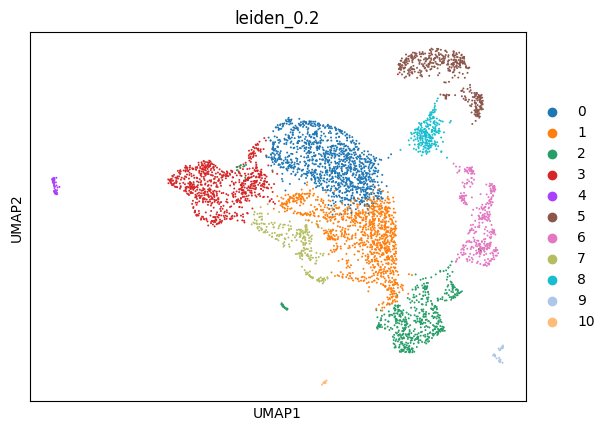

In [9]:
sc.tl.leiden(RNA_data_brain, flavor="igraph", n_iterations=2, resolution=0.2, key_added="leiden_0.2")
sc.pl.umap(RNA_data_brain, color=["leiden_0.2"], size=8)

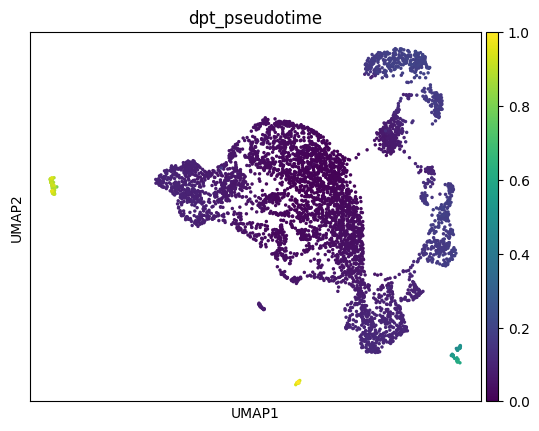

In [10]:
root_cell = RNA_data_brain.obs[RNA_data_brain.obs['leiden_0.2'] == '0'].index[0]

# Set the root cell index in the .uns dictionary
RNA_data_brain.uns['iroot'] = RNA_data_brain.obs_names.get_loc(root_cell)

# Compute diffusion map and DPT pseudotime
sc.tl.diffmap(RNA_data_brain)
sc.tl.dpt(RNA_data_brain)

# Visualize pseudotime on UMAP
sc.pl.umap(RNA_data_brain, color='dpt_pseudotime', color_map='viridis')

In [11]:
RNA_data_brain.obs['dpt_pseudotime']

AAACAGCCAACCGCCA-1    0.000000
AAACAGCCAAGGTCGA-1    0.111977
AAACAGCCAGGAACAT-1    0.045829
AAACAGCCATATTGAC-1    0.099422
AAACAGCCATCAGCAC-1    0.905649
                        ...   
TTTGTGGCATTTGCTC-1    0.012900
TTTGTGTTCAATGACC-1    0.059356
TTTGTTGGTAGACAAA-1    0.195807
TTTGTTGGTGGAGCAA-1    0.052283
TTTGTTGGTTAGAGCC-1    0.032454
Name: dpt_pseudotime, Length: 4881, dtype: float32

Mouse brain SHAREseq dataset (not annotated)

In [17]:
share_rna = sc.read_mtx('data/GSE126074_P0_BrainCortex_SNAREseq_cDNA.counts.mtx.gz')
share_rna = share_rna.transpose()

In [18]:
barcodes = pd.read_csv('data/GSE126074_P0_BrainCortex_SNAREseq_cDNA.barcodes.tsv', sep='\t', header=None)
genes = pd.read_csv('data/GSE126074_P0_BrainCortex_SNAREseq_cDNA.genes.tsv', sep='\t', header=None)

In [19]:
share_rna.obs_names = barcodes[0].values
share_rna.var_names = genes[0].values

In [21]:
sc.pp.normalize_total(share_rna, target_sum=1e6)
sc.pp.log1p(share_rna)
sc.pp.highly_variable_genes(share_rna, n_top_genes=3000)
sc.pp.pca(share_rna, n_comps=50)
sc.pp.neighbors(share_rna, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(share_rna, random_state=99)
sc.tl.leiden(share_rna, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")


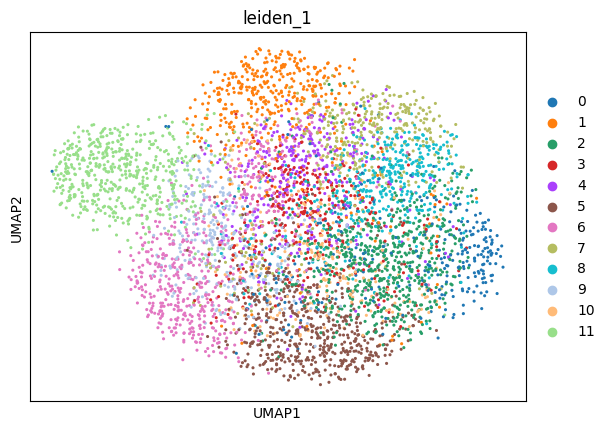

In [23]:
sc.pl.umap(share_rna, color="leiden_1", size=20)

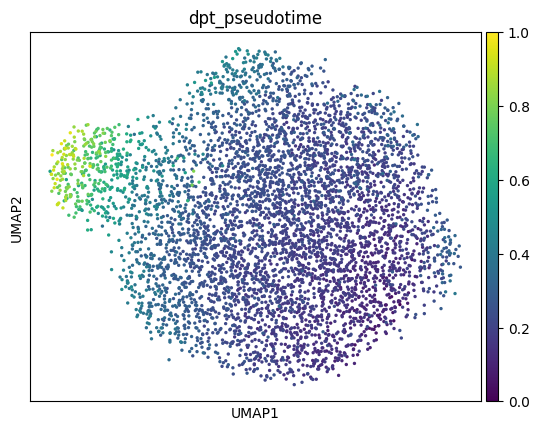

In [24]:
root_cell = share_rna.obs[share_rna.obs['leiden_1'] == '2'].index[0]

# Set the root cell index in the .uns dictionary
share_rna.uns['iroot'] = share_rna.obs_names.get_loc(root_cell)

# Compute diffusion map and DPT pseudotime
sc.tl.diffmap(share_rna)
sc.tl.dpt(share_rna)

# Visualize pseudotime on UMAP
sc.pl.umap(share_rna, color='dpt_pseudotime', color_map='viridis')

In [7]:
bmmc_data = sc.read_h5ad('scButterfly/data/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad')

In [9]:
RNA_data_bmmc = bmmc_data[:, bmmc_data.var['feature_types'] == 'GEX'].copy()
ATAC_data_bmmc = bmmc_data[:, bmmc_data.var['feature_types'] == 'ATAC'].copy()

In [11]:
RNA_data_bmmc

AnnData object with n_obs × n_vars = 69249 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [12]:
sc.pp.normalize_total(RNA_data_bmmc, target_sum=1e6)
sc.pp.log1p(RNA_data_bmmc)
sc.pp.highly_variable_genes(RNA_data_bmmc, n_top_genes=3000)
sc.pp.pca(RNA_data_bmmc, n_comps=50)
sc.pp.neighbors(RNA_data_bmmc, n_neighbors=15, use_rep='X_pca')

In [13]:
sc.tl.umap(RNA_data_bmmc, random_state=99)

In [ ]:
RNA_data_bmmc[RNA_data_bmmc.obs['cell_type'] in ['Naive CD20+ B', 'Transitional B', 'Plasma cell', 'Lymph prog'], :]

View of AnnData object with n_obs × n_vars = 1 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

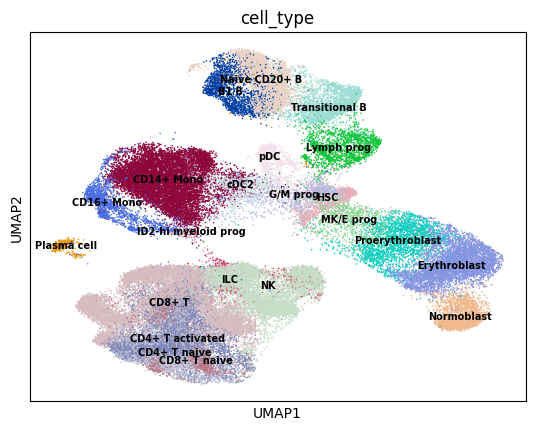

In [22]:
sc.pl.umap(RNA_data_bmmc, color=["cell_type"], size=5, legend_loc='on data', legend_fontsize=7)

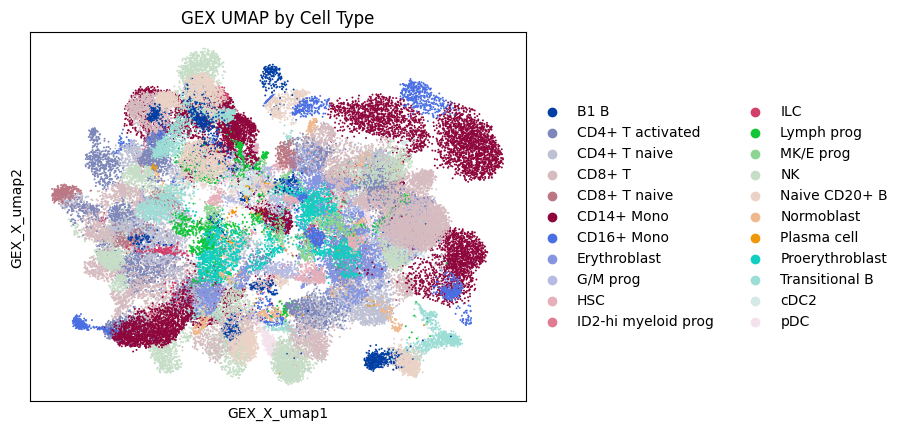

In [40]:
sc.pl.embedding(bmmc_data, 
           basis='GEX_X_umap',  # Specify the GEX UMAP embedding
           color='cell_type',   # Color by cell type       # Remove frame, # Position legend on the plot
           title='GEX UMAP by Cell Type',
           size=8)

Natalia dataset

In [2]:
mouse_embryo = sc.read_10x_h5('scButterfly/data/GSM8699898_Expanded_filtered_feature_bc_matrix.h5', gex_only=False)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
mouse_embryo.var

,gene_ids,feature_types,genome,interval
Xkr4,ENSMUSG00000051951,Gene Expression,mm10,chr1:3671497-3671498
Gm1992,ENSMUSG00000089699,Gene Expression,mm10,chr1:3466586-3466587
Gm19938,ENSMUSG00000102331,Gene Expression,mm10,chr1:3658903-3658904
Gm37381,ENSMUSG00000102343,Gene Expression,mm10,chr1:3985983-3986215
Rp1,ENSMUSG00000025900,Gene Expression,mm10,chr1:4360313-4409241
...,...,...,...,...
GL456216.1:43882-44710,GL456216.1:43882-44710,Peaks,mm10,GL456216.1:43882-44710
GL456216.1:48782-49664,GL456216.1:48782-49664,Peaks,mm10,GL456216.1:48782-49664
GL456216.1:56942-57767,GL456216.1:56942-57767,Peaks,mm10,GL456216.1:56942-57767
JH584292.1:12543-13449,JH584292.1:12543-13449,Peaks,mm10,JH584292.1:12543-13449
